In [15]:
#formula 
# daily_rate = rate * qty / days_in_month
# billable_amount = daily_rate * active_days

In [16]:
print('Monthly Billing System using Python') 


Monthly Billing System using Python


In [17]:
from datetime import datetime
from collections import defaultdict
import calendar


In [18]:
def generate_monthly_bill(item_list: list, target_month: str) -> dict:
    year, month = map(int, target_month.split('-'))
    month_start = datetime(year, month, 1)
    last_day = calendar.monthrange(year, month)[1]
    month_end = datetime(year, month, last_day)

    grouped_items = defaultdict(lambda: {"qty": 0, "amount": 0.0})
    total_revenue = 0.0

    for item in item_list:
        start_date = datetime.strptime(item["start_date"], "%Y-%m-%d")
        stop_date = datetime.strptime(item["stop_date"], "%Y-%m-%d")
        rate = float(item["rate"])
        qty = int(item["qty"])

        active_start = max(month_start, start_date)
        active_end = min(month_end, stop_date)
        if active_start > active_end:
            continue

        billing_period = f"{active_start.date()} to {active_end.date()}"
        active_days = (active_end - active_start).days + 1
        days_in_month = (month_end - month_start).days + 1

        daily_rate = (rate * qty) / days_in_month
        amount = round(daily_rate * active_days, 2)

        key = (item["item_code"], rate, billing_period)
        grouped_items[key]["qty"] += qty
        grouped_items[key]["amount"] += amount
        total_revenue += amount

    line_items = []
    for (item_code, rate, billing_period), values in grouped_items.items():
        line_items.append({
            "item_code": item_code,
            "rate": rate,
            "qty": values["qty"],
            "amount": round(values["amount"], 2),
            "billing_period": billing_period
        })

    return {
        "line_items": line_items,
        "total_revenue": round(total_revenue, 2)
    }


In [19]:
item_list = [
    {"idx": 1, "item_code": "Executive Desk (4*2)", "sales_description": "Dedicated Executive Desk", "qty": 10, "rate": "1000", "amount": "10000", "start_date": "2023-11-01", "stop_date": "2024-10-17"},
    {"idx": 2, "item_code": "Executive Desk (4*2)", "qty": "10", "rate": "1080", "amount": "10800", "start_date": "2024-10-18", "stop_date": "2025-10-31"},
    {"idx": 3, "item_code": "Executive Desk (4*2)", "qty": 15, "rate": "1080", "amount": "16200", "start_date": "2024-11-01", "stop_date": "2025-10-31"},
    {"idx": 4, "item_code": "Executive Desk (4*2)", "qty": 5, "rate": "1000", "amount": "5000", "start_date": "2024-11-01", "stop_date": "2025-10-31"},
    {"idx": 5, "item_code": "Manager Cabin", "qty": 5, "rate": 5000, "amount": 25000, "start_date": "2024-11-01", "stop_date": "2025-10-31"},
    {"idx": 6, "item_code": "Manager Cabin", "qty": 7, "rate": "5000", "amount": 35000, "start_date": "2024-12-15", "stop_date": "2025-10-31"},
    {"idx": 7, "item_code": "Manager Cabin", "qty": 10, "rate": 4600, "amount": 46000, "start_date": "2023-11-01", "stop_date": "2024-10-17"},
    {"idx": 8, "item_code": "Parking (2S)", "qty": 10, "rate": 1000, "amount": 10000, "start_date": "2024-11-01", "stop_date": "2025-10-31"},
    {"idx": 9, "item_code": "Parking (2S)", "qty": 10, "rate": 0, "amount": 0, "start_date": "2024-11-01", "stop_date": "2025-10-31"},
    {"idx": 10, "item_code": "Executive Desk (4*2)", "qty": "8", "rate": "1100", "amount": "8800", "start_date": "2024-11-15", "stop_date": "2025-01-31"},
    {"idx": 11, "item_code": "Manager Cabin", "qty": "3", "rate": "5200", "amount": "15600", "start_date": "2024-10-10", "stop_date": "2024-11-10"},
    {"idx": 12, "item_code": "Conference Table", "qty": 1, "rate": "20000", "amount": "20000", "start_date": "2024-11-05", "stop_date": "2024-11-20"},
    {"idx": 13, "item_code": "Parking (2S)", "qty": 5, "rate": "1000", "amount": "5000", "start_date": "2024-11-15", "stop_date": "2025-02-28"},
    {"idx": 14, "item_code": "Reception Desk", "qty": 2, "rate": "7000", "amount": "14000", "start_date": "2024-11-01", "stop_date": "2025-03-31"},
    {"idx": 15, "item_code": "Reception Desk", "qty": 1, "rate": "7000", "amount": "7000", "start_date": "2024-11-10", "stop_date": "2024-11-25"},
    {"idx": 16, "item_code": "Breakout Area", "qty": 3, "rate": "3000", "amount": "9000", "start_date": "2024-01-01", "stop_date": "2024-01-31"}
]


In [20]:
result = generate_monthly_bill(item_list, "2024-11")
result


{'line_items': [{'item_code': 'Executive Desk (4*2)',
   'rate': 1080.0,
   'qty': 25,
   'amount': 27000.0,
   'billing_period': '2024-11-01 to 2024-11-30'},
  {'item_code': 'Executive Desk (4*2)',
   'rate': 1000.0,
   'qty': 5,
   'amount': 5000.0,
   'billing_period': '2024-11-01 to 2024-11-30'},
  {'item_code': 'Manager Cabin',
   'rate': 5000.0,
   'qty': 5,
   'amount': 25000.0,
   'billing_period': '2024-11-01 to 2024-11-30'},
  {'item_code': 'Parking (2S)',
   'rate': 1000.0,
   'qty': 10,
   'amount': 10000.0,
   'billing_period': '2024-11-01 to 2024-11-30'},
  {'item_code': 'Parking (2S)',
   'rate': 0.0,
   'qty': 10,
   'amount': 0.0,
   'billing_period': '2024-11-01 to 2024-11-30'},
  {'item_code': 'Executive Desk (4*2)',
   'rate': 1100.0,
   'qty': 8,
   'amount': 4693.33,
   'billing_period': '2024-11-15 to 2024-11-30'},
  {'item_code': 'Manager Cabin',
   'rate': 5200.0,
   'qty': 3,
   'amount': 5200.0,
   'billing_period': '2024-11-01 to 2024-11-10'},
  {'item_code'

In [24]:
import pandas as pd

df = pd.DataFrame(result['line_items'])
display(df)

print("Total Revenue:", result['total_revenue'])




,item_code,rate,qty,amount,billing_period
0,Executive Desk (4*2),1080.0,25,27000.00,2024-11-01 to 2024-11-30
1,Executive Desk (4*2),1000.0,5,5000.00,2024-11-01 to 2024-11-30
2,Manager Cabin,5000.0,5,25000.00,2024-11-01 to 2024-11-30
3,Parking (2S),1000.0,10,10000.00,2024-11-01 to 2024-11-30
4,Parking (2S),0.0,10,0.00,2024-11-01 to 2024-11-30
5,Executive Desk (4*2),1100.0,8,4693.33,2024-11-15 to 2024-11-30
6,Manager Cabin,5200.0,3,5200.00,2024-11-01 to 2024-11-10
7,Conference Table,20000.0,1,10666.67,2024-11-05 to 2024-11-20
8,Parking (2S),1000.0,5,2666.67,2024-11-15 to 2024-11-30
9,Reception Desk,7000.0,2,14000.00,2024-11-01 to 2024-11-30


Total Revenue: 107960.0


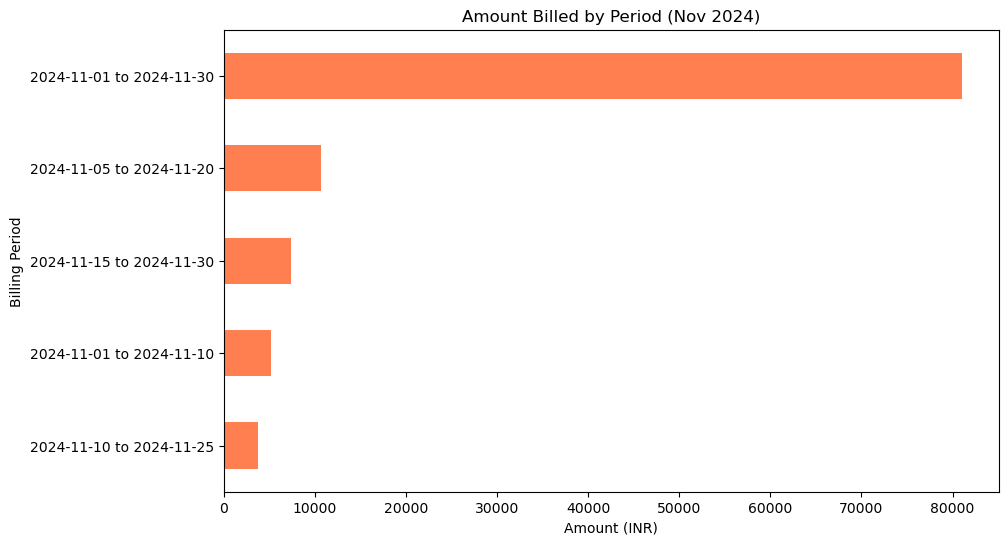

In [32]:
amount_by_period = df.groupby("billing_period")["amount"].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
amount_by_period.plot(kind='barh', color='coral')
plt.title("Amount Billed by Period (Nov 2024)")
plt.xlabel("Amount (INR)")
plt.ylabel("Billing Period")

plt.show()


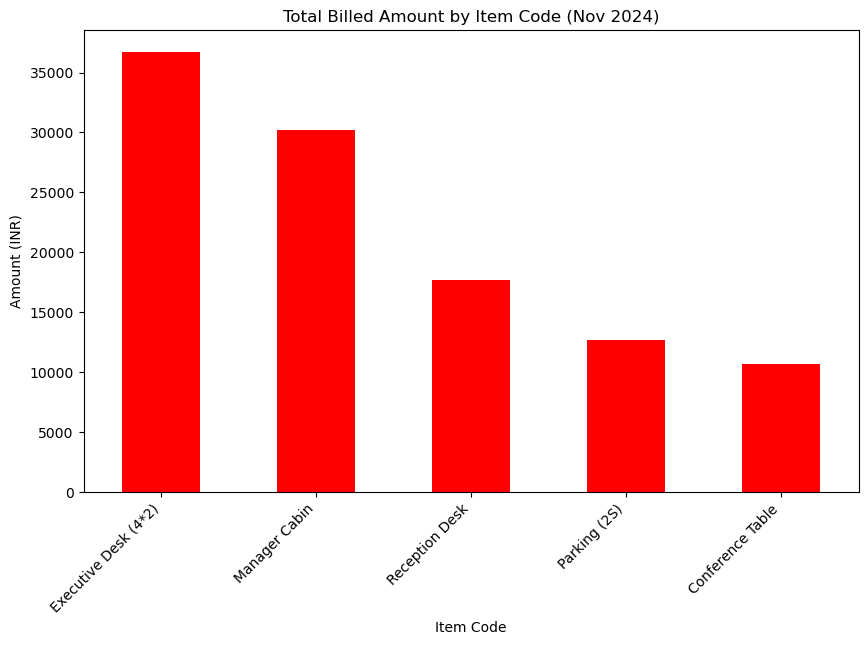

In [31]:
import matplotlib.pyplot as plt

# Group total amount by item_code
amount_by_item = df.groupby("item_code")["amount"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
amount_by_item.plot(kind='bar', color='red')
plt.title("Total Billed Amount by Item Code (Nov 2024)")
plt.xlabel("Item Code")
plt.ylabel("Amount (INR)")
plt.xticks(rotation=45, ha='right')

plt.show()

